In [336]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib

highres_colors = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060"]

highres_colors_5_class = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060",
    "#FF0000"]

one_for_all = [
    "#FFFFFF",
    "#FF0000"
]
highres_cmap = matplotlib.colors.ListedColormap(highres_colors)
highres_5_cmap  = matplotlib.colors.ListedColormap(highres_colors_5_class)
one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)

# Untuned 4 class

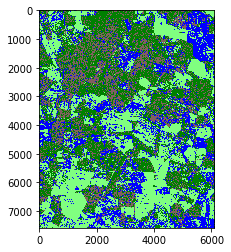

In [2]:
base_src = rasterio.open("../landcover-old/web_tool/data/test_inference_base/m_3807537_ne_18_1_20170611_class.tif")
plt.imshow(base_src.read(1),vmin=0, vmax=4, cmap=highres_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# Newly Unsupervised Tuned 5 class

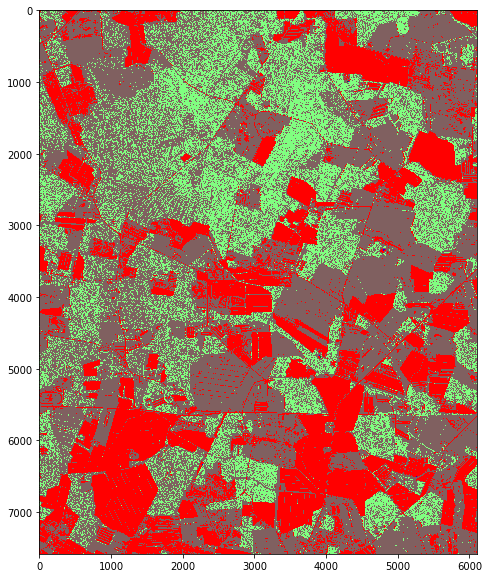

In [339]:
src = rasterio.open("../landcover-old/web_tool/data/test_inference_again/test_demo.tif")
plt.imshow(src.read(1)[1:],vmin=0, vmax=4, cmap=highres_5_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [32]:
print(src.read(1))

[[2 4 2 ... 3 3 4]
 [2 2 2 ... 3 3 0]
 [2 2 2 ... 3 3 0]
 ...
 [3 3 0 ... 2 2 2]
 [3 3 0 ... 2 2 2]
 [3 3 3 ... 2 2 2]]


# Old Unsupervised Tuned 5 class

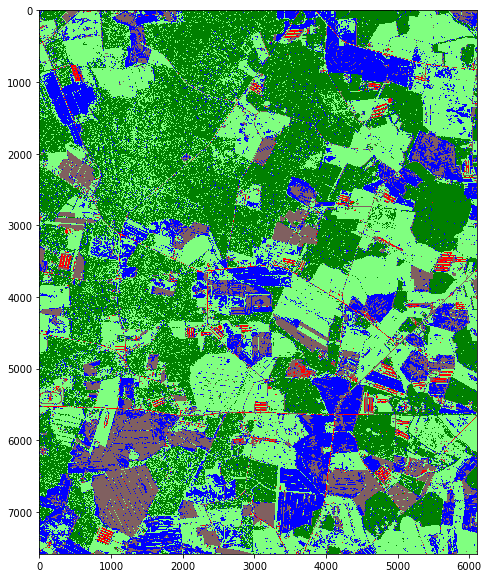

In [346]:
src = rasterio.open("../landcover-old/web_tool/data/test_inference/m_3807537_ne_18_1_20170611_class.tif")
plt.imshow(src.read(1),vmin=0, vmax=4, cmap=highres_5_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# New Naip demo tuned

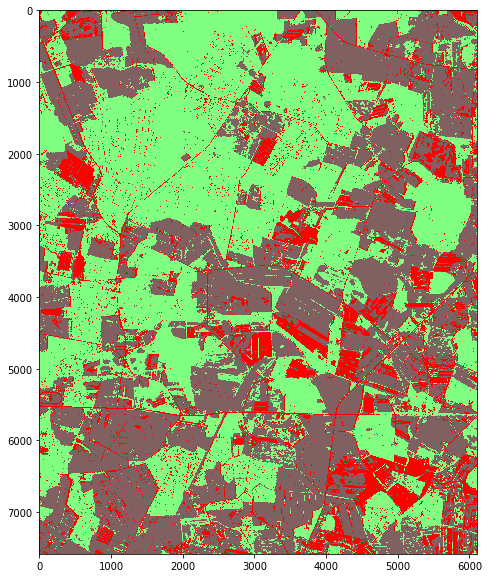

In [344]:
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo1.tif")
plt.imshow(src_demo.read(1)[1:],vmin=0, vmax=4, cmap=highres_5_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [299]:
np.unique(src_demo.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2829,    33567, 20803633, 19380627,  3700510,  2429294]))

# Old Naip demo tuned

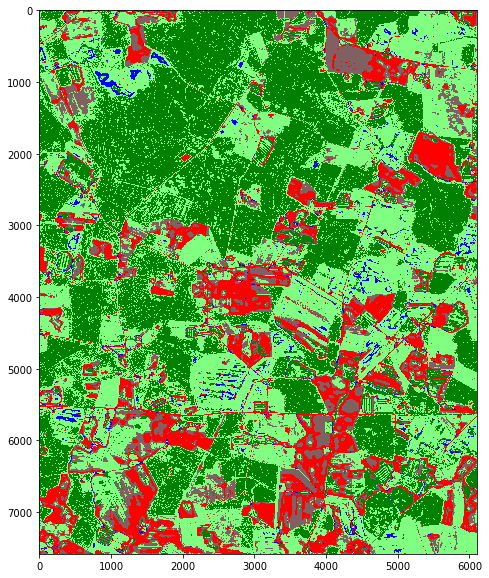

In [345]:
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/m_3807537_ne_18_1_20170611_class.tif")
plt.imshow(src_demo.read(1)[1:],vmin=0, vmax=4, cmap=highres_5_cmap)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# Metrics

In [186]:
import sklearn.metrics

# Tuned autoencoder

In [350]:
src_masked = rasterio.open("./m_3807537_ne_18_1_20170611_rasterized2.tif")
y_true = np.array(src_masked.read())

# New
src = rasterio.open("../landcover-old/web_tool/data/test_inference_again/test_demo.tif")
raw = np.array(src.read())
y_pred = (raw == 5) # chicken
y_pred = y_pred.astype(int)

# Old
# src = rasterio.open("../landcover-old/web_tool/data/test_inference/m_3807537_ne_18_1_20170611_class.tif")
# raw = np.array(src.read())
# y_pred = (raw == 4) # chicken
# y_pred = y_pred.astype(int)


y_true = y_true.squeeze()
y_pred = y_pred.squeeze()

In [351]:
np.unique(src.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2532,     2255,  9724002, 24412549, 11720710,   488412]))

In [352]:
tp = np.sum((y_true == 1) & (y_pred == 1))
tn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

assert tp + tn + fp + fn == y_true.size

n = tp + fp + tn + fn

acc = (tp+tn)/n
recall = (tp/(tp+fn))
precision = tp / (tp + fp)
iou = tp /(tp + fn + fp)

print("IOU: {}".format(iou))
print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

IOU: 0.4721123138230224
Accuracy: 0.993552340149375
Precision: 0.5472347116778458
Recall: 0.7747310082552639


# Tuned demo

In [359]:
# New
src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo1.tif")
raw_demo = np.array(src_demo.read())
y_pred_demo = (raw_demo == 5) # chicken
y_pred_demo = y_pred_demo.astype(int)
y_pred_demo = y_pred_demo.squeeze()

# Old
# src_demo = rasterio.open("../landcover-old/web_tool/data/test_inference_demo_tuned/m_3807537_ne_18_1_20170611_class.tif")
# raw_demo = np.array(src_demo.read())
# y_pred_demo = (raw_demo == 4) # chicken
# y_pred_demo = y_pred_demo.astype(int)
# y_pred_demo = y_pred_demo.squeeze()

In [360]:
np.unique(src_demo.read(1), return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([    2829,    33567, 20803633, 19380627,  3700510,  2429294]))

In [361]:
tp = np.sum((y_true == 1) & (y_pred_demo == 1))
tn = np.sum((y_true == 0) & (y_pred_demo == 0))
fp = np.sum((y_true == 0) & (y_pred_demo == 1))
fn = np.sum((y_true == 1) & (y_pred_demo == 0))

assert tp + tn + fp + fn == y_true.size

n = tp + fp + tn + fn

acc = (tp+tn)/n
recall = (tp/(tp+fn))
precision = tp / (tp + fp)
iou = tp /(tp + fn + fp)

print("IOU: {}".format(iou))
print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

IOU: 0.1371166367114731
Accuracy: 0.9545802997424405
Precision: 0.13770708691496378
Recall: 0.9696775577404694
